# **Project Name - Zomato Restaurant Clustering and Sentiment Analysis**


##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Submitted By**    - Shuban Borkar
##### **GitHub**    - [Repository Link](https://github.com/pvanand07/Zomato_Restaurant_Clustering_Unsupervised_ML/blob/master/)

Zomato, founded in 2008 by Deepinder Goyal and Pankaj Chaddah, is an Indian food delivery and restaurant aggregator platform. It offers detailed information such as menus, user reviews, and ratings of restaurants, and provides food delivery services in select cities through partner establishments. India is renowned for its rich culinary diversity, with a vast number of restaurants and hotels reflecting the country’s cultural unity in diversity. The restaurant industry in India is constantly evolving, with an increasing number of people embracing the concept of dining out or ordering in.

With the rapid rise in the number of restaurants across Indian states, it becomes crucial to analyze the available data to uncover insights, trends, and interesting patterns about the food industry in various cities. This project aims to explore and analyze Zomato’s restaurant data across different cities in India.

Focusing on both customers and the company, the project involves conducting sentiment analysis on customer reviews to derive meaningful conclusions and presenting them through insightful visualizations. It also includes segmenting the Zomato-listed restaurants into clusters based on key attributes. Visualizing the data enables quick and intuitive analysis, helping both customers and the company.

For customers, the analysis can assist in identifying the best restaurants in their vicinity. For Zomato, the findings can highlight areas of improvement and opportunities for business growth. Additionally, the dataset contains valuable information related to cuisine types and pricing, allowing for a cost-benefit analysis. Sentiment analysis of reviews, along with reviewer metadata, can also be used to identify influential critics within the industry.

<div style="text-align:center">
    <h1>Zomato Restaurant Data</h1>    
    <img src="/Zomato_Data.png" width="600" height="600"/>
</div>

# **Problem Statement**

In India's ever-evolving restaurant industry, Zomato has built a rich dataset capturing diverse dining experiences across cities. This project focuses on extracting valuable insights from that data to benefit both users and the platform.

### 1. Sentiment Analysis

By analyzing customer reviews, we aim to understand user satisfaction and highlight the strengths and weaknesses of various restaurants. This helps diners make informed decisions and supports Zomato in improving its service.

### 2. Restaurant Clustering

Using clustering techniques, we group restaurants based on factors like cuisine, cost, and ratings. This segmentation provides a clearer view of the market and supports strategic decision-making for the company.

### 3. Business Insights

The combined insights from sentiment analysis and clustering can help users find top-rated local spots and enable Zomato to identify improvement areas, optimize offerings, and adapt to customer preferences.


# **Code**

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from numpy import loadtxt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MultiLabelBinarizer

import warnings
warnings.filterwarnings('ignore')

In [52]:
restaurant_data = pd.read_csv('/Names and Metadata.csv')
reviews = pd.read_csv('/Reviews.csv')
print('restaurant_data shape:', restaurant_data.shape)
print("reviews shape:",reviews.shape)

restaurant_data shape: (105, 6)
reviews shape: (10000, 7)


In [53]:
restaurant_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [54]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [55]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [56]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [57]:
# Check for duplicates
print("Duplicates in restaurant_data:",restaurant_data.duplicated().sum())
print("Duplicates in reviews:",reviews.duplicated().sum())

Duplicates in restaurant_data: 0
Duplicates in reviews: 36


In [58]:
# Check for missing values
print("Missing values in restaurant_data:")
print(restaurant_data.isnull().sum(),"\n")
print("Missing values in reviews:")
print(reviews.isnull().sum())

Missing values in restaurant_data:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 

Missing values in reviews:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


In [59]:
# Dataset Columns
print("Features in restaurent data: ",restaurant_data.columns.tolist())
print("Features in review data: ",reviews.columns.tolist())

Features in restaurent data:  ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Features in review data:  ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [60]:
# Dataset Describe
restaurant_data.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [61]:
reviews.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Restaurant Data:
- Name: Name of Restaurants
- Links: URL Links of Restaurants
- Cost: Per person estimated cost of dining
- Collection: Tagging of Restaurants w.r.t. Zomato categories
- Cuisines: Cuisines served by restaurants
- Timings: Restaurant timings

### Review Data:
- Reviewer: Name of the reviewer
- Review: Review text
- Rating: Rating provided
- MetaData: Reviewer metadata - Number of reviews and followers
- Time: Date and Time of Review
- Pictures: Number of pictures posted with review

In [62]:
# Check Unique Values for each variable.
for i in restaurant_data.columns.tolist():
  print("Unique",i,":",restaurant_data[i].nunique(),"\n")

Unique Name : 105 

Unique Links : 105 

Unique Cost : 29 

Unique Collections : 42 

Unique Cuisines : 92 

Unique Timings : 77 



In [63]:
# Check Unique Values for each variable.
for i in reviews.columns.tolist():
  print("Unique",i,":",reviews[i].nunique(),"\n")

Unique Restaurant : 100 

Unique Reviewer : 7446 

Unique Review : 9364 

Unique Rating : 10 

Unique Metadata : 2477 

Unique Time : 9782 

Unique Pictures : 36 



In [64]:
#  Handling missing values

# Dropping collections column since most of the values are null
restaurant_data.drop("Collections",axis=1,inplace=True)

# Dropping remaining null values from restaurant_data and reviews since they are very few
restaurant_data.dropna(inplace=True)
reviews.dropna(inplace=True)

# Check for missing values After handling
print("Missing values in restaurant_data:")
print(restaurant_data.isnull().sum(),"\n")
print("Missing values in reviews:")
print(reviews.isnull().sum())


Missing values in restaurant_data:
Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64 

Missing values in reviews:
Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64


In [65]:
# Drop duplicate rows
restaurant_data.drop_duplicates(inplace=True)
reviews.drop_duplicates(inplace=True)
print("restaurant_data shape:",restaurant_data.shape)
print("reviews shape:",reviews.shape)

restaurant_data shape: (104, 5)
reviews shape: (9955, 7)


In [66]:
# Lets extract cuisines from the Cuisines(string) column and store as a list
print("Cuisines data Before preprocessing:\n")
print(restaurant_data.Cuisines[0])
print("\nCuisines data After preprocessing:\n")
print("",restaurant_data.Cuisines[0].lower().replace(" ","").split(","))

Cuisines data Before preprocessing:

Chinese, Continental, Kebab, European, South Indian, North Indian

Cuisines data After preprocessing:

 ['chinese', 'continental', 'kebab', 'european', 'southindian', 'northindian']


In [67]:
# Lets apply the preprocessing steps on the Cuisines column
restaurant_data["Cuisines_list"] = restaurant_data.Cuisines.apply(lambda x: x.lower().replace(" ","").split(","))

# Lets check the names of count of unique cuisines
cusines_set = set()
for cuisines in restaurant_data.Cuisines_list:
  cusines_set.update(cuisines)
print("Total number of unique cuisines: ",len(cusines_set))
cusines_set

Total number of unique cuisines:  44


{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fastfood',
 'fingerfood',
 'goan',
 'healthyfood',
 'hyderabadi',
 'icecream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modernindian',
 'momos',
 'mughlai',
 'northeastern',
 'northindian',
 'pizza',
 'salad',
 'seafood',
 'southindian',
 'spanish',
 'streetfood',
 'sushi',
 'thai',
 'wraps'}

In [68]:
# Preprocess and convert the cost column to int data type
restaurant_data.Cost = restaurant_data.Cost.apply(lambda x: x.replace(",","")).astype(int)
restaurant_data.Cost

,Cost
0,800
1,800
2,1300
3,800
4,1200
...,...
100,600
101,200
102,500
103,250


In [69]:
restaurant_data.Cost.describe()

,Cost
count,104.000000
mean,861.057692
std,512.605979
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [70]:
restaurant_data[["Name","Cost","Cuisines_list"]]

,Name,Cost,Cuisines_list
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,1300,"[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"[asian, continental, northindian, chinese, med..."
...,...,...,...
100,IndiBlaze,600,"[fastfood, salad]"
101,Sweet Basket,200,"[bakery, mithai]"
102,Angaara Counts 3,500,"[northindian, biryani, chinese]"
103,Wich Please,250,[fastfood]


In [71]:
# replace non numbers with NAN
reviews.Rating = pd.to_numeric(reviews.Rating, errors='coerce')

In [72]:
reviews.Rating.fillna(reviews.Rating.mean(), inplace=True)

In [73]:
# Checking the Metadata column to create a regex expression
followers = reviews.Metadata.apply(lambda x: x.split(",")[-1])
print(followers.apply(lambda x: x.split(" ")[-1]).value_counts())

review_count = reviews.Metadata.apply(lambda x: x.split(",")[0])
print(review_count.apply(lambda x: x.split(" ")[-1]).value_counts())

Metadata
Followers    6748
Follower     1633
Review        916
Reviews       658
Name: count, dtype: int64
Metadata
           8381
Review      916
Reviews     658
Name: count, dtype: int64


In [74]:
import re
def extract_follower_and_review_count(text):

    # Define regular expressions for review and followers
    review_pattern = r'(\d+) Review'
    followers_pattern = r'(\d+) Follower'

    # Search for the review and followers using regex
    review_match = re.search(review_pattern, text)
    followers_match = re.search(followers_pattern, text)

    # Extract the review and followers values
    review = review_match.group(1) if review_match else 0
    followers = followers_match.group(1) if followers_match else 0
    return [review, followers]

extract_follower_and_review_count("1 Review , 22 Follower")

['1', '22']

In [75]:
reviews[['prev_reviews_count', 'followers_count']] = reviews['Metadata'].apply(extract_follower_and_review_count).apply(pd.Series)

In [76]:
reviews.drop('Metadata', axis=1, inplace=True)

In [77]:
merged_restaurant_data = pd.merge(reviews, restaurant_data[["Name","Cost","Cuisines_list"]], left_on='Restaurant', right_on='Name')
merged_restaurant_data

,Restaurant,Reviewer,Review,Rating,Time,Pictures,prev_reviews_count,followers_count,Name,Cost,Cuisines_list
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
...,...,...,...,...,...,...,...,...,...,...,...
9850,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,6/5/2016 0:08,0,53,54,Chinese Pavilion,1000,"[chinese, seafood]"
9851,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,6/4/2016 22:01,0,2,53,Chinese Pavilion,1000,"[chinese, seafood]"
9852,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,6/3/2016 10:37,3,65,423,Chinese Pavilion,1000,"[chinese, seafood]"
9853,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,5/31/2016 17:22,0,13,144,Chinese Pavilion,1000,"[chinese, seafood]"


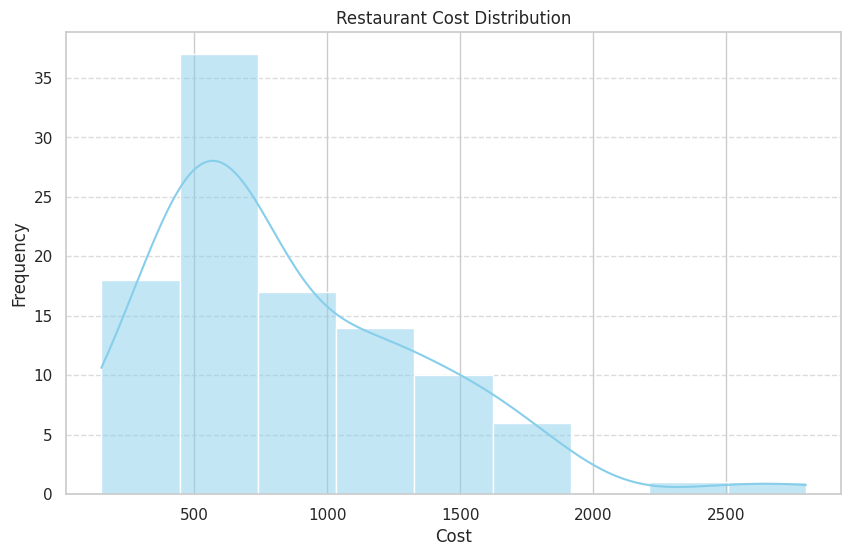


 count     104.000000
mean      861.057692
std       512.605979
min       150.000000
25%       500.000000
50%       700.000000
75%      1200.000000
max      2800.000000
Name: Cost, dtype: float64


In [78]:
# Bivariate with Categorical - Numerical
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=restaurant_data, x='Cost', kde=True, color='skyblue')
plt.title('Restaurant Cost Distribution')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n",restaurant_data['Cost'].describe())


 count    9955.000000
mean        3.600261
std         1.483498
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64


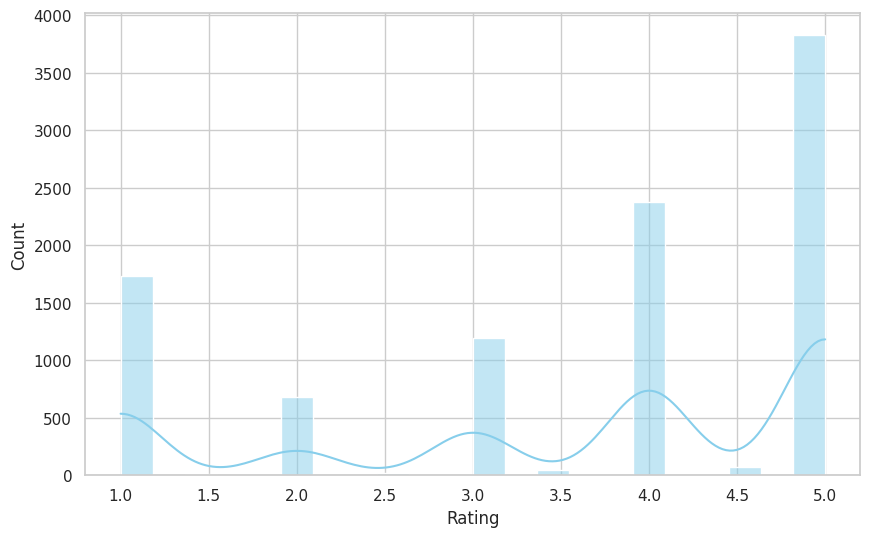

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(data = reviews, x = 'Rating', kde = True, color = 'skyblue')

print("\n",reviews['Rating'].describe())

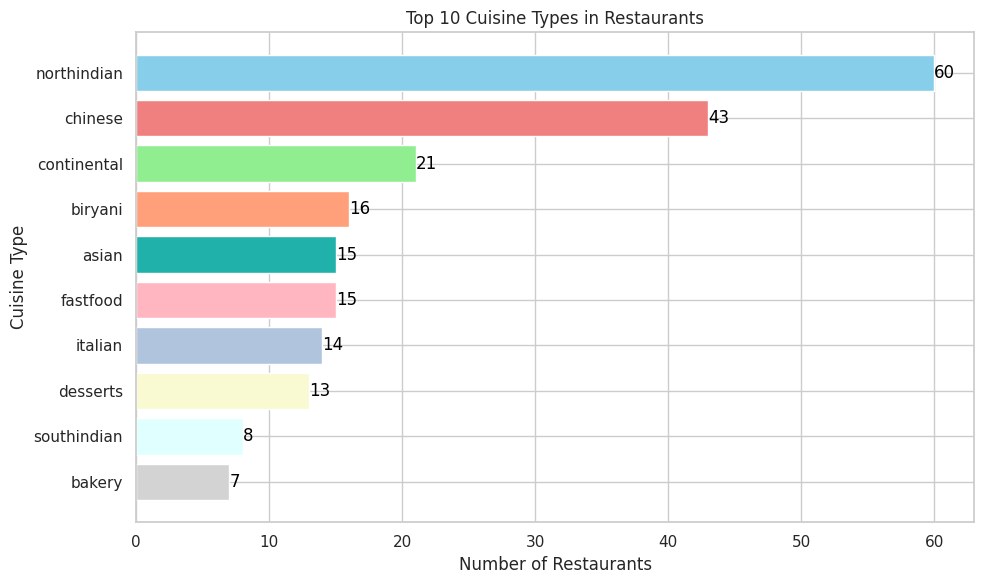

In [80]:
all_cuisines = []

for cuisine_list in restaurant_data.Cuisines_list:
    for cuisine in cuisine_list:
        all_cuisines.append(cuisine)

# Count the occurrences of each cuisine type
cuisine_counts = pd.Series(all_cuisines).value_counts()

# Choose the top N cuisine types to display on the y-axis
top_n = 10  # You can change this number as needed
cuisine_counts = cuisine_counts.head(top_n)

# custom color palette
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue', 'lightgoldenrodyellow', 'lightcyan', 'lightgray']

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(cuisine_counts.index, cuisine_counts.values, color=colors)

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', ha='left', va='center', fontsize=12, color='black')

plt.title('Top {} Cuisine Types in Restaurants'.format(top_n))
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine Type')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most common cuisine at the top

plt.tight_layout()
plt.show()


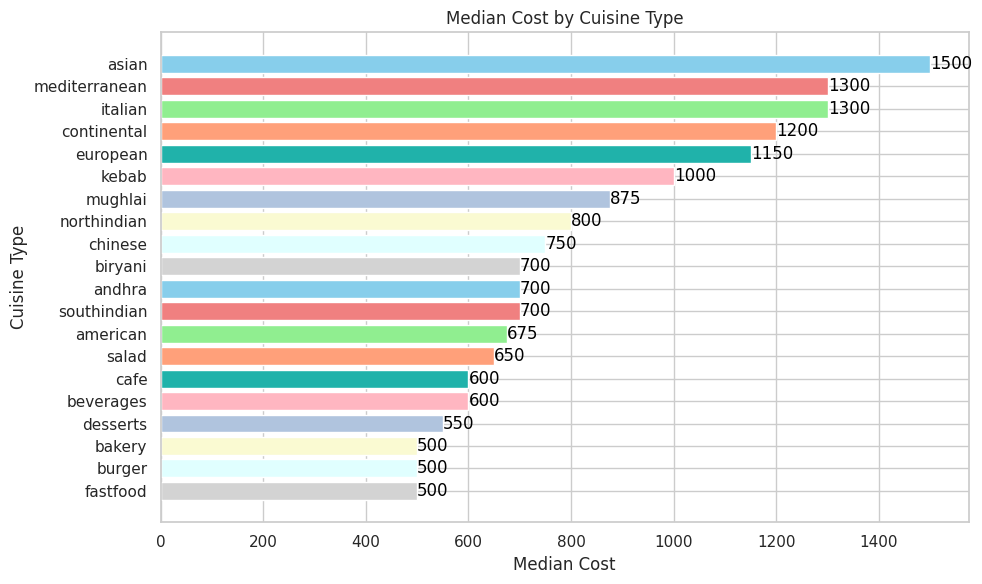

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explode the full DataFrame on the Cuisines_list column to align Cost with each cuisine
exploded_df = restaurant_data.explode('Cuisines_list')

# Create a new DataFrame with cuisine types and corresponding costs
cuisine_cost_df = exploded_df[['Cuisines_list', 'Cost']].rename(columns={'Cuisines_list': 'Cuisine Type'})

# Clean whitespace and drop missing values (optional but recommended)
cuisine_cost_df['Cuisine Type'] = cuisine_cost_df['Cuisine Type'].str.strip()
cuisine_cost_df.dropna(inplace=True)

# Count the occurrences of each cuisine type and select the top 20
top_20_cuisines = cuisine_cost_df['Cuisine Type'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 cuisines
cuisine_cost_df_top_20 = cuisine_cost_df[cuisine_cost_df['Cuisine Type'].isin(top_20_cuisines)]

# Calculate the median cost for each cuisine type and sort by median cost
average_cost_by_cuisine = cuisine_cost_df_top_20.groupby('Cuisine Type')['Cost'].median().sort_values(ascending=False).reset_index()

# Custom color palette (repeating colors if needed)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen',
          'lightpink', 'lightsteelblue', 'lightgoldenrodyellow', 'lightcyan', 'lightgray'] * 2

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(average_cost_by_cuisine['Cuisine Type'], average_cost_by_cuisine['Cost'], color=colors)

# Add labels to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=12, color='black')

plt.title('Median Cost by Cuisine Type')
plt.xlabel('Median Cost')
plt.ylabel('Cuisine Type')
plt.gca().invert_yaxis()  # Show the most expensive cuisines at the top
plt.tight_layout()
plt.show()


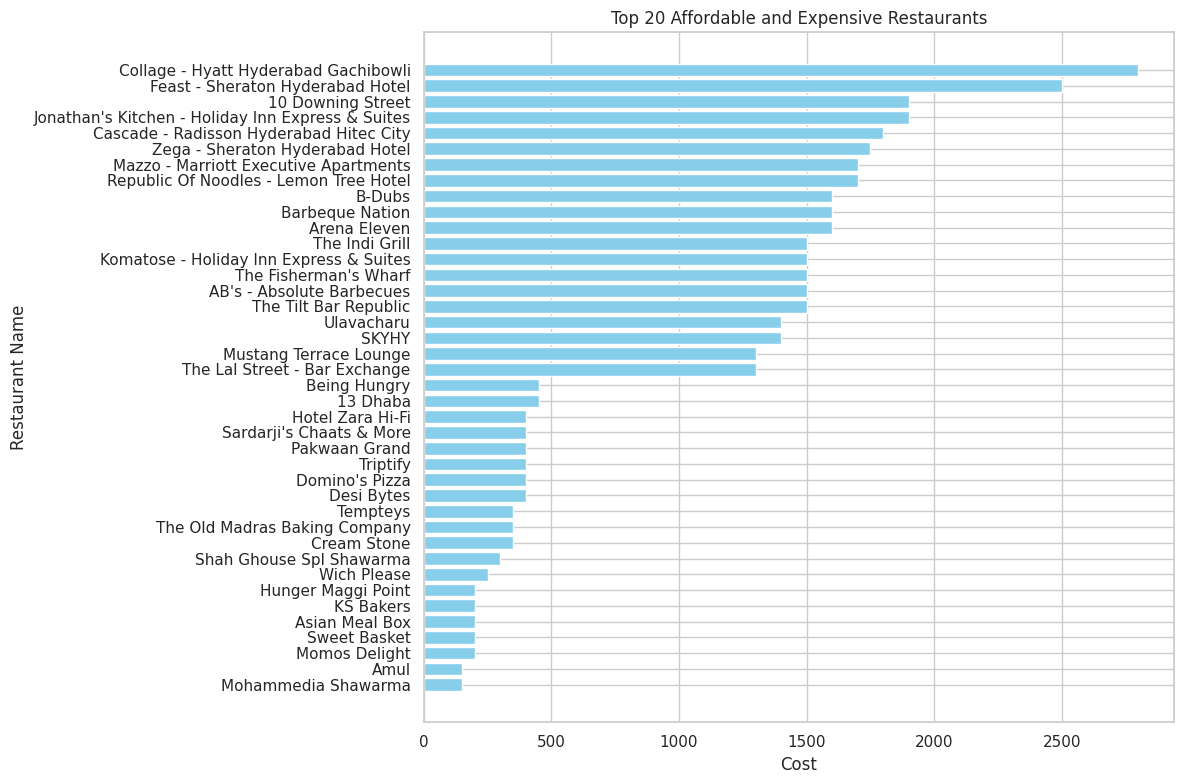


 Statistics for top 20 expensive restaurants
             Cost
count    20.00000
mean   1687.50000
std     374.82452
min    1300.00000
25%    1500.00000
50%    1600.00000
75%    1762.50000
max    2800.00000

 Statistics for top 20 affordable restaurants
             Cost
count   20.000000
mean   310.000000
std    104.629673
min    150.000000
25%    200.000000
50%    350.000000
75%    400.000000
max    450.000000


In [82]:
# Sort the DataFrame by cost in ascending order (affordable to expensive)
affordable_restaurants = restaurant_data.sort_values(by='Cost', ascending=False).tail(20)

# Sort the DataFrame by cost in descending order (expensive to affordable)
expensive_restaurants = restaurant_data.sort_values(by='Cost', ascending=False).head(20)

# Concatenate both DataFrames to create a single DataFrame with the top 20 affordable and top 20 expensive restaurants
top_restaurants = pd.concat([expensive_restaurants,affordable_restaurants])

# Create a bar plot to visualize the top 20 affordable and top 20 expensive restaurants
plt.figure(figsize=(12, 8))
plt.barh(top_restaurants['Name'], top_restaurants['Cost'], color='skyblue')
plt.title('Top 20 Affordable and Expensive Restaurants')
plt.xlabel('Cost')
plt.ylabel('Restaurant Name')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest cost at the top
plt.tight_layout()

plt.show()

print("\n Statistics for top 20 expensive restaurants")
print(expensive_restaurants.describe())
print("\n Statistics for top 20 affordable restaurants")
print(affordable_restaurants.describe())


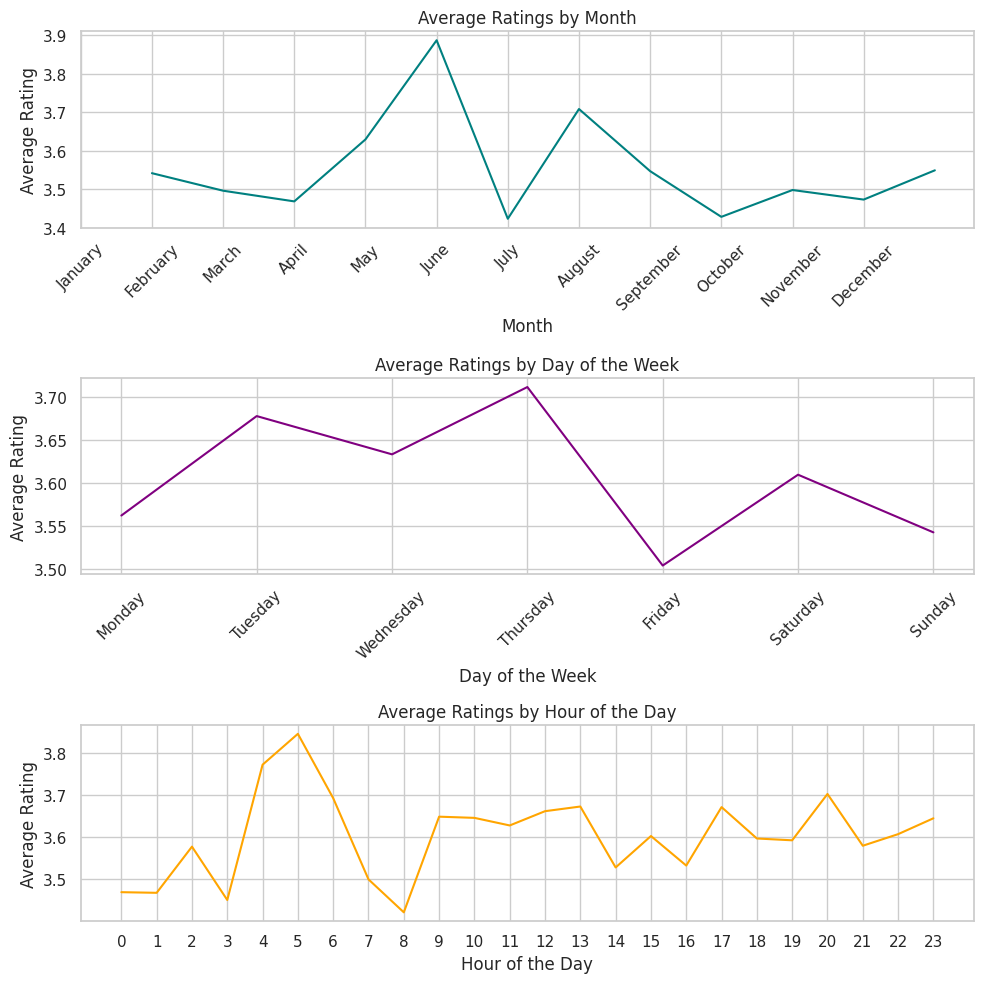

In [83]:
import pandas as pd
import datetime as dt

# Converting 'Time' column to datetime
reviews['Time'] = pd.to_datetime(reviews['Time'])

# Extracting month, day of the week, and hour
reviews['Month'] = reviews['Time'].dt.month
reviews['DayOfWeek'] = reviews['Time'].dt.day_name()
reviews['Hour'] = reviews['Time'].dt.hour

# Seasonal Trend Analysis: Average Rating by Month
monthly_avg_rating = reviews.groupby('Month')['Rating'].mean()

# Weekly Trend Analysis: Average Rating by Day of the Week
weekly_avg_rating = reviews.groupby('DayOfWeek')['Rating'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Hourly Trend Analysis: Average Rating by Hour of the Day
hourly_avg_rating = reviews.groupby('Hour')['Rating'].mean()

# Plotting all three trends in a single figure with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Monthly Trend Plot
axs[0].plot(monthly_avg_rating, color='teal')
axs[0].set_title('Average Ratings by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Average Rating')
axs[0].set_xticks(range(0, 12))
axs[0].set_xticklabels([dt.date(2000, m, 1).strftime('%B') for m in range(1, 13)])
axs[0].tick_params(axis='x', rotation=45)

# Weekly Trend Plot
axs[1].plot(weekly_avg_rating, color='purple')
axs[1].set_title('Average Ratings by Day of the Week')
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Average Rating')
axs[1].set_xticks(range(7))
axs[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
axs[1].tick_params(axis='x', rotation=45)

# Hourly Trend Plot
axs[2].plot(hourly_avg_rating, color='orange')
axs[2].set_title('Average Ratings by Hour of the Day')
axs[2].set_xlabel('Hour of the Day')
axs[2].set_ylabel('Average Rating')
axs[2].set_xticks(range(0, 24))
axs[2].grid(True)

plt.tight_layout()
plt.show()

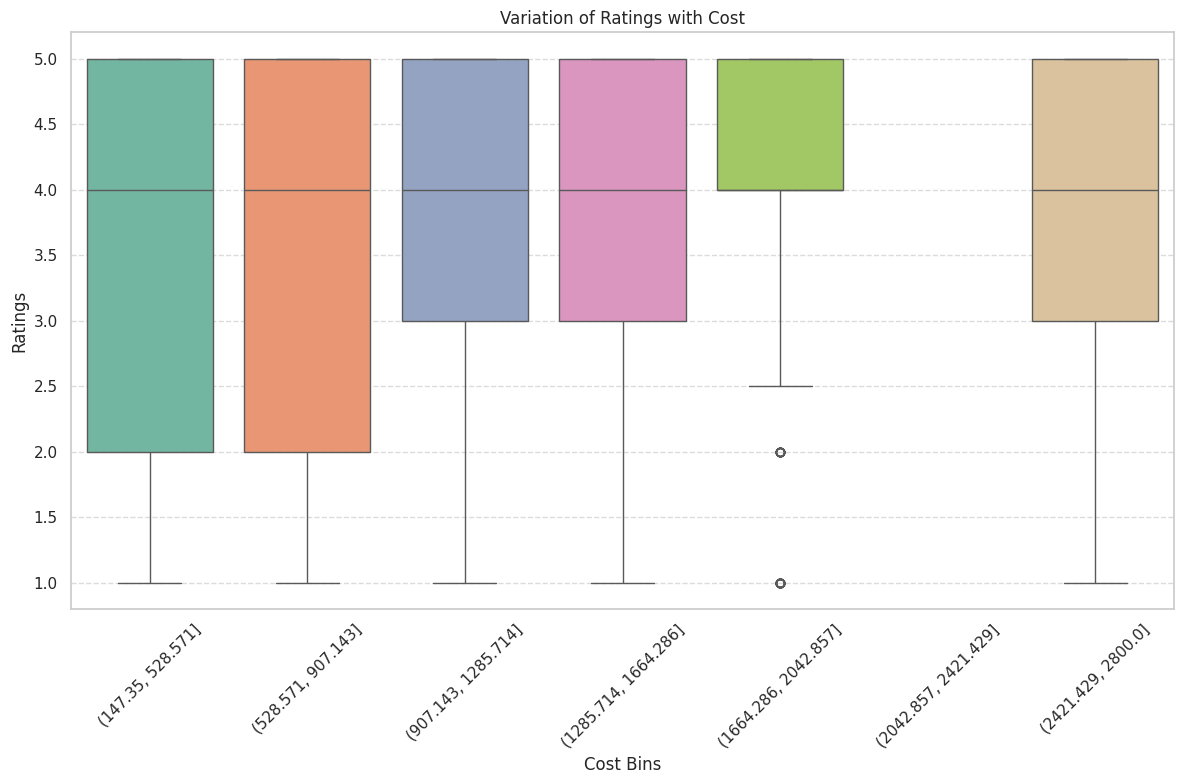

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for enhanced styling


# Create 10 bins for the 'Cost' column
merged_restaurant_data['Cost_Bin'] = pd.cut(merged_restaurant_data['Cost'], bins=7)

# Set a custom color palette for the plot
colors = sns.color_palette("Set2")

# Create a box plot with seaborn for better styling
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set the style to whitegrid
sns.boxplot(x='Cost_Bin', y='Rating', data=merged_restaurant_data, palette=colors)
plt.xticks(rotation=45)
plt.title('Variation of Ratings with Cost')
plt.xlabel('Cost Bins')
plt.ylabel('Ratings')

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the plot further as needed, e.g., adjusting fonts, colors, etc.

plt.tight_layout()  # Ensure the plot is well-fit within the figure
plt.show()


# **Sentiment Analysis**

In [85]:
def clean_string(input_string):
    cleaned_string = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|\d+", "", input_string.lower())
    return cleaned_string

reviews['Review Cleaned'] = reviews['Review'].apply(clean_string)

In [86]:
import pandas as pd
from textblob import TextBlob

# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Applying the function to the review column
reviews['Sentiment'] = reviews['Review Cleaned'].apply(get_sentiment)

# Classifying sentiments into positive, negative, and neutral
reviews['Sentiment_Type'] = reviews['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Displaying the first few rows with the sentiment analysis
reviews[['Review Cleaned', 'Sentiment', 'Sentiment_Type']].head()

,Review Cleaned,Sentiment,Sentiment_Type
0,the ambience was good food was quite good had...,0.660000,positive
1,ambience is too good for a pleasant evening se...,0.606667,positive
2,a must try great food great ambience thnx for ...,0.550000,positive
3,soumen das and arun was a great guy only becau...,0.500000,positive
4,food is goodwe ordered kodi drumsticks and bas...,0.577500,positive


In [106]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [89]:
def extract_food_entities(review):
    doc = nlp(review)
    # Extract noun from text using spacy
    food_entities = [token.text for token in doc if token.pos_ == 'NOUN']
    return food_entities

# Apply the function to each review
reviews['Food_Entities'] = reviews['Review Cleaned'].apply(extract_food_entities)

# Display the first few rows with extracted food entities
reviews[['Review Cleaned', 'Food_Entities']].head()


,Review Cleaned,Food_Entities
0,the ambience was good food was quite good had...,"[ambience, food, lunch, cost, place, sate, bru..."
1,ambience is too good for a pleasant evening se...,"[ambience, evening, service, food, experience,..."
2,a must try great food great ambience thnx for ...,"[food, ambience, thnx, service, pradeep, recom..."
3,soumen das and arun was a great guy only becau...,"[guy, behavior, sincerety, food, course, place]"
4,food is goodwe ordered kodi drumsticks and bas...,"[food, goodwe, drumsticks, basket, mutton, bir..."


In [90]:
reviews['Food_Entities'].value_counts()

,count
Food_Entities,
[],779
[food],90
[delivery],82
[service],47
[taste],38
...,...
"[option, stars, experience, food, service, managers, people, lies, calls, order, delivery, guy, words, customers, delivery, partnerif, hotel, business, change, management, name, brand, house]",1
"[place, hygienic, place, hyderabad, staff]",1
"[restaurant, today, experience, restaurant, dinner, family, friends, hour, end, items, order, bill, items, mins, bill, times, fro]",1


In [91]:
from collections import defaultdict

# Initialize dictionaries to hold the sum of values of sentiments for each food item
food_sentiment_counts = defaultdict(lambda: {'positive': 0, 'negative': 0, 'neutral': 0})

# Iterating through each review
for index, row in reviews.iterrows():
    sentiment = row['Sentiment_Type']
    sentiment_value = row['Sentiment']
    for food_item in row['Food_Entities']:
        # Get the cumulative sentiment value for this food item
        food_sentiment_counts[food_item][sentiment] += sentiment_value

# Now, food_sentiment_counts has the sentiment counts for each food item
food_sentiment_count_df = pd.DataFrame.from_dict(food_sentiment_counts, orient='index')
food_sentiment_count_df

,positive,negative,neutral
ambience,571.158724,-17.306281,0.0
food,1719.914005,-250.291961,0.0
lunch,134.550627,-14.109992,0.0
cost,24.847752,-2.613763,0.0
place,1683.921676,-110.171211,0.0
...,...,...,...
segregation,0.107800,0.000000,0.0
husbandthe,0.470000,0.000000,0.0
carvings,0.470000,0.000000,0.0
wolly,0.094444,0.000000,0.0


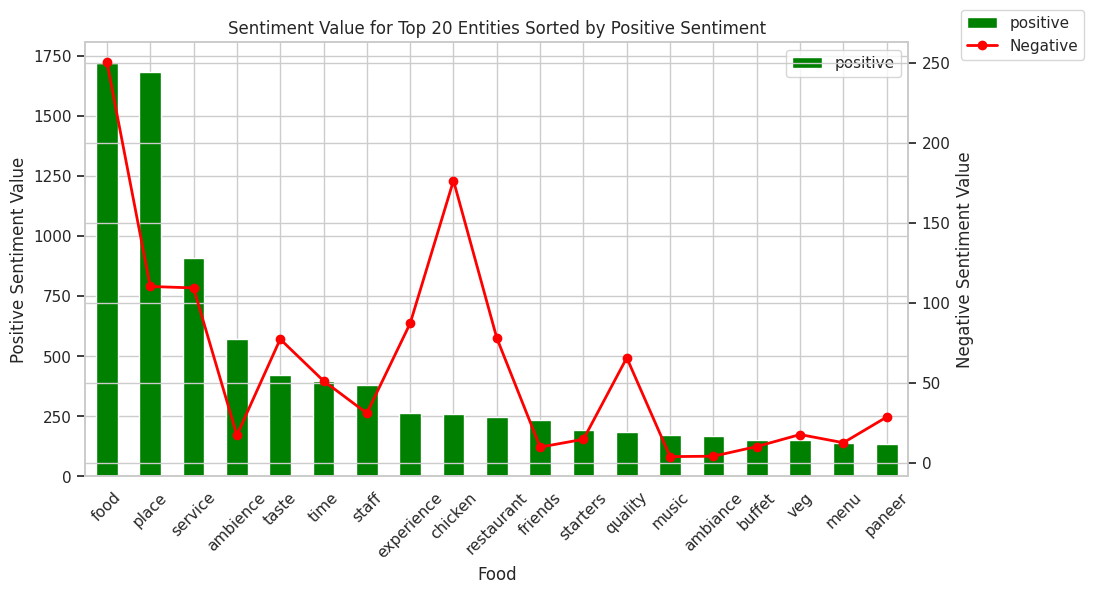

In [92]:

# Finding the threshold to filter the top values (greater than the 20th highest positive sentiment value)
threshold = food_sentiment_count_df['positive'].sort_values(ascending=False)[19]

# Filtering the DataFrame
top_sentiments_df = food_sentiment_count_df[food_sentiment_count_df['positive'] > threshold].sort_values(by='positive', ascending=False)


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart for positive counts and any other sentiment counts except negative
top_sentiments_df[['positive']].plot(kind='bar', stacked=True, ax=ax, color='green')

# Line chart for negative values
ax2 = ax.twinx()
(top_sentiments_df['negative']*(-1)).plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Negative')

# Labels and legend
ax.set_xlabel('Food')
ax.set_ylabel('Positive Sentiment Value')
ax2.set_ylabel('Negative Sentiment Value')
ax.set_title('Sentiment Value for Top 20 Entities Sorted by Positive Sentiment')
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.set_xticklabels(top_sentiments_df.index, rotation=45)

plt.tight_layout()
plt.show()


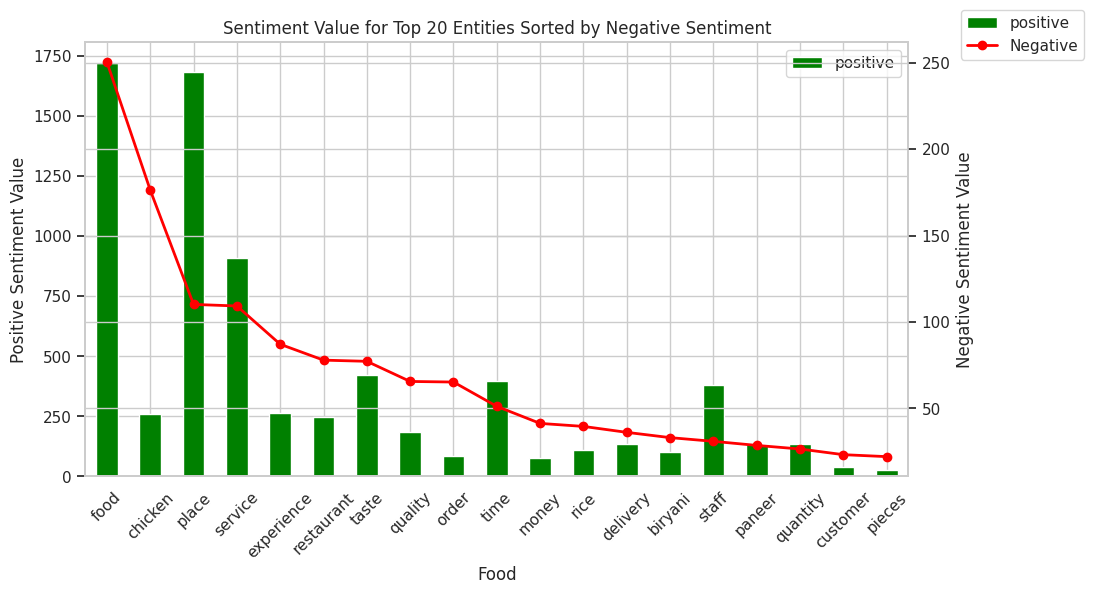

In [93]:

# Finding the threshold to filter the top values (greater than the 20th highest positive sentiment value)
threshold = food_sentiment_count_df['negative'].sort_values(ascending=True)[19]

# Filtering the DataFrame
top_sentiments_df = food_sentiment_count_df[food_sentiment_count_df['negative'] < threshold].sort_values(by='negative', ascending=True)


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar chart for positive counts and any other sentiment counts except negative
top_sentiments_df[['positive']].plot(kind='bar', stacked=True, ax=ax, color='green')

# Line chart for negative values
ax2 = ax.twinx()
(top_sentiments_df['negative']*(-1)).plot(kind='line', ax=ax2, color='red', marker='o', linewidth=2, label='Negative')

# Labels and legend
ax.set_xlabel('Food')
ax.set_ylabel('Positive Sentiment Value')
ax2.set_ylabel('Negative Sentiment Value')
ax.set_title('Sentiment Value for Top 20 Entities Sorted by Negative Sentiment')
fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
ax.set_xticklabels(top_sentiments_df.index, rotation=45)
plt.tight_layout()
plt.show()

# **Feature Engineering**


In [94]:
# Creating a copy of the dataset for further feature engineering
from sklearn.preprocessing import MultiLabelBinarizer

# Create a MultiLabelBinarizer
mlb = MultiLabelBinarizer()
features = mlb.fit_transform(restaurant_data.Cuisines_list)

# Create a DataFrame with the cuisine labels
features_df = pd.DataFrame(features, columns=mlb.classes_)

# Add resataurant name and cost to the features dataFrame
features_df['Cost'] = restaurant_data['Cost']
features_df['Name'] = restaurant_data['Name']

#features_df['avg_rating'] = restaurant_data_ratings['Rating']
features_df.set_index('Name', inplace=True)
features_df

,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,burger,cafe,...,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Cost
Name,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,800.0
Paradise,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,800.0
Flechazo,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1300.0
Shah Ghouse Hotel & Restaurant,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,800.0
Over The Moon Brew Company,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chinese Pavilion,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1000.0
IndiBlaze,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,600.0
Sweet Basket,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,200.0


In [95]:
features_df['Avg_Ratings'] = reviews.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False)

# Fill Missing Ratings and Cost values with mean
features_df['Avg_Ratings'].fillna(value = features_df['Avg_Ratings'].mean(), inplace = True)
features_df['Cost'].fillna(value = features_df['Cost'].mean(), inplace = True)

In [96]:
# Select only the cuisines that occure more than 7 times
selected_features = features_df.columns[features_df.sum(axis=0)>7].tolist()
selected_features

['asian',
 'biryani',
 'chinese',
 'continental',
 'desserts',
 'fastfood',
 'italian',
 'northindian',
 'southindian',
 'Cost',
 'Avg_Ratings']

# **ML Model Implementation**

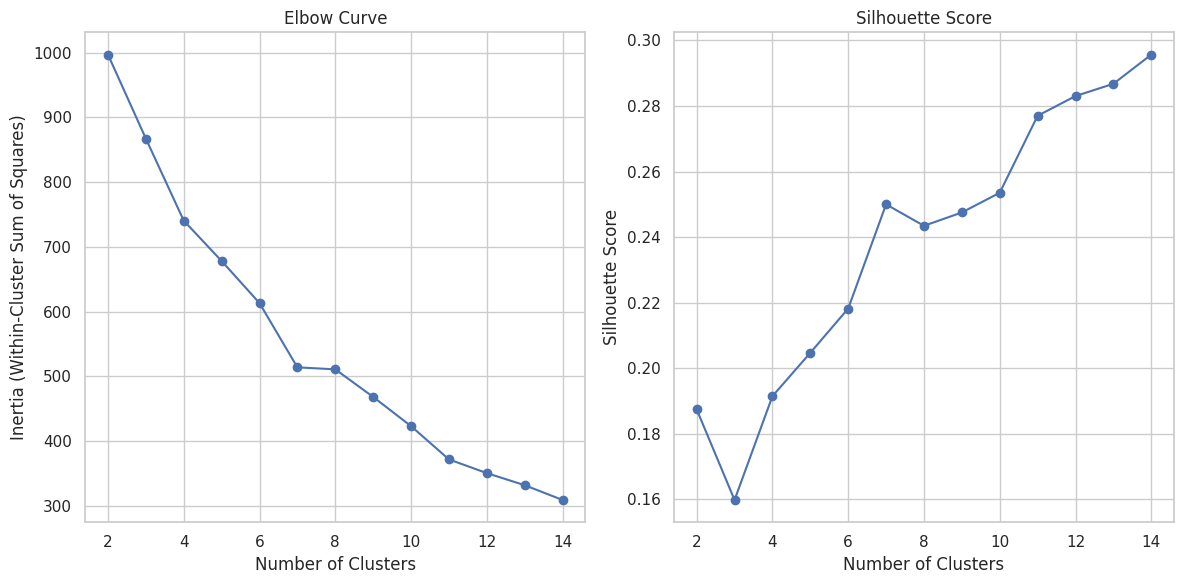

Optimal number of clusters: 14


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#X = features_df
X= StandardScaler().fit_transform(features_df[selected_features])

# Define a range of cluster numbers to try
cluster_range = range(2, 15)  # You can adjust this range as needed

# Initialize lists to store the inertia (within-cluster sum of squares) and silhouette scores
inertia_values = []
silhouette_scores = []

# Perform K-means clustering for each cluster number in the range
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
    kmeans.fit(X)

    # Calculate the inertia and silhouette score for this cluster number
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')

# Plot the silhouette score to evaluate cluster quality
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Based on the plots, you can choose the optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_clusters}")


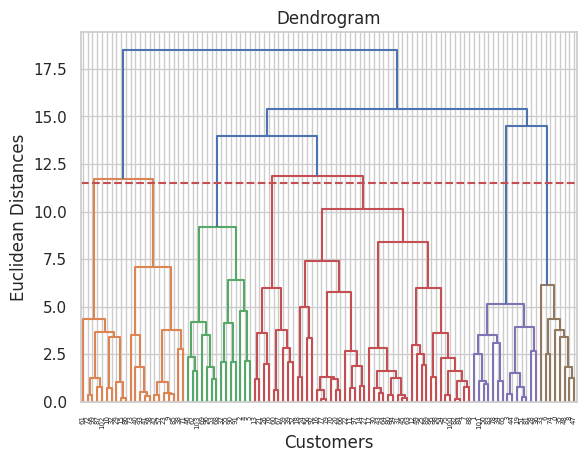

In [98]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=11.5, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [100]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering on the t-SNE transformed data
hc = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
features_df['Cluster'] = hc.fit_predict(X)


In [101]:
results_df = features_df[selected_features+['Cluster']]
results_df

,asian,biryani,chinese,continental,desserts,fastfood,italian,northindian,southindian,Cost,Avg_Ratings,Cluster
Name,,,,,,,,,,,,
Beyond Flavours,0,0,1,1,0,0,0,1,1,800.0,4.280000,2
Paradise,0,1,1,0,0,0,0,1,0,800.0,4.700000,3
Flechazo,1,0,0,0,1,0,0,1,0,1300.0,4.660000,1
Shah Ghouse Hotel & Restaurant,0,1,1,0,0,0,0,1,0,800.0,3.210000,3
Over The Moon Brew Company,1,0,1,1,0,0,0,1,0,1200.0,4.340000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
Chinese Pavilion,0,0,0,0,0,1,0,0,0,1000.0,3.745000,6
IndiBlaze,0,0,0,0,0,0,0,0,0,600.0,3.604736,0
Sweet Basket,0,1,1,0,0,0,0,1,0,200.0,3.604736,3


In [102]:
results_df_grouped = results_df.groupby('Cluster').sum()
results_df_grouped[['Cost','Avg_Ratings']] = results_df[['Cost','Avg_Ratings','Cluster']].groupby('Cluster').mean()
results_df_grouped

,asian,biryani,chinese,continental,desserts,fastfood,italian,northindian,southindian,Cost,Avg_Ratings
Cluster,,,,,,,,,,,
0,0,0,15,6,0,0,0,23,0,901.430071,3.560539
1,14,0,6,6,1,0,4,6,0,1110.714286,3.850885
2,1,1,5,2,0,0,1,8,8,725.000000,3.451250
3,0,14,12,1,0,0,0,13,0,800.000000,3.514624
4,0,1,0,1,12,5,0,0,0,620.833333,3.717146
5,0,0,4,5,0,0,9,7,0,961.111111,3.650667
6,0,0,1,0,0,10,0,3,0,670.000000,3.496376


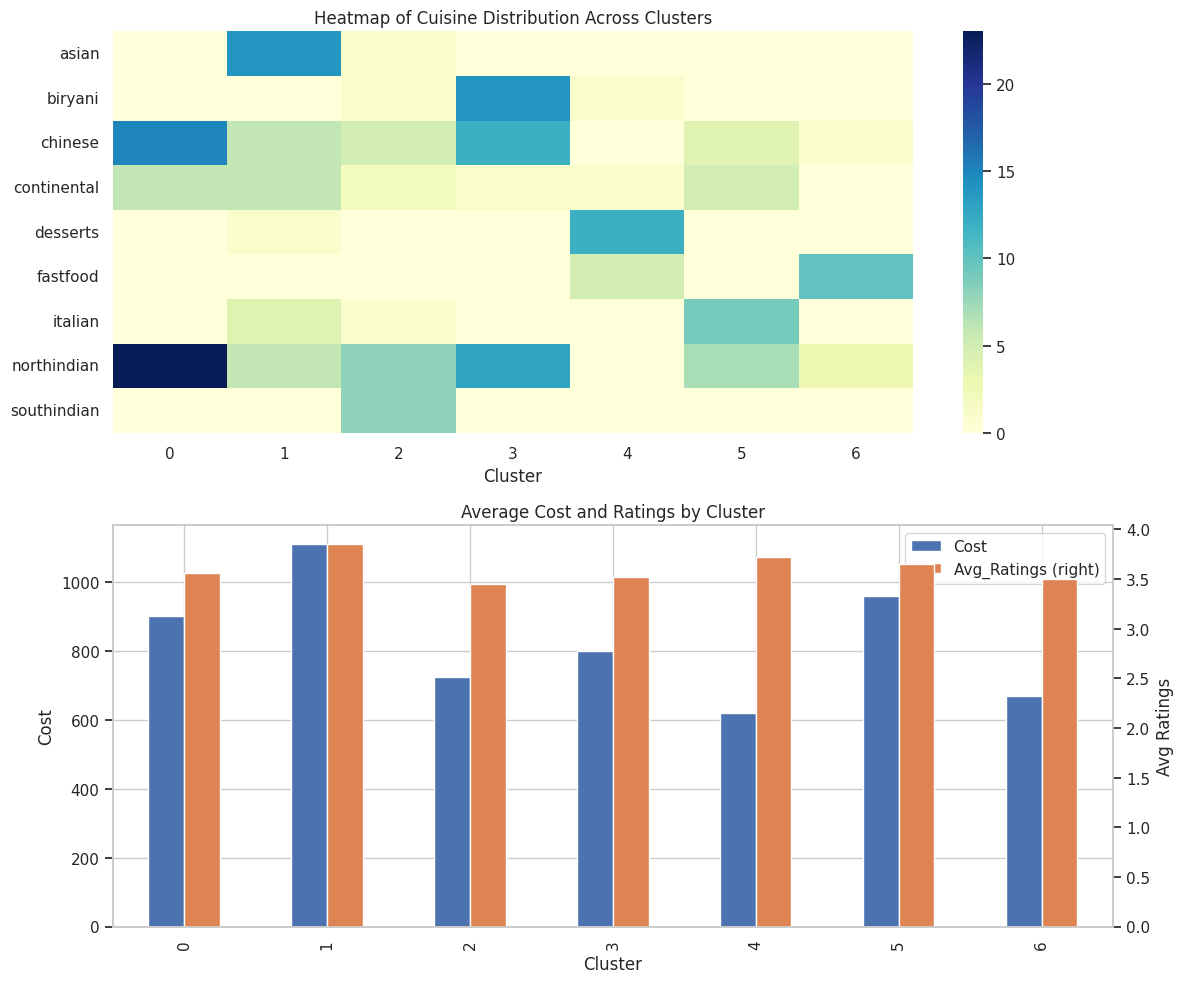

In [103]:
#@title Cuisine Distribution Across Clusters
# Preparing the data for heatmap
cuisine_data = results_df_grouped.drop(['Cost', 'Avg_Ratings'], axis=1)
cost_ratings_data = results_df_grouped[['Cost', 'Avg_Ratings']]

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Heatmap for cuisine distribution
sns.heatmap(cuisine_data.T, cmap="YlGnBu", ax=ax[0])  # Transposing for better layout
ax[0].set_title('Heatmap of Cuisine Distribution Across Clusters')

# Grouped bar chart for cost and ratings
cost_ratings_data.plot(kind='bar', ax=ax[1], secondary_y='Avg_Ratings')
ax[1].set_title('Average Cost and Ratings by Cluster')
ax[1].set_ylabel('Cost')
ax[1].right_ax.set_ylabel('Avg Ratings')

plt.tight_layout()
plt.show()


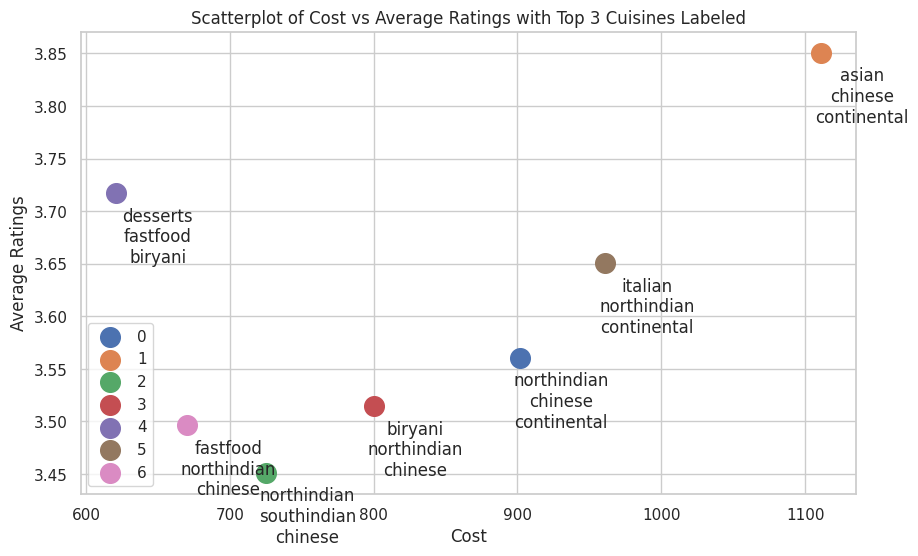

In [104]:
#@title Scatterplot of Cost vs Average Ratings with Top 3 Cuisines Labeled
df = results_df_grouped.reset_index()

# Plotting the scatterplot
plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.scatter(row['Cost'], row['Avg_Ratings'],s=200, label=f"{int(row['Cluster'])}")
    top_cuisines = row.drop(['Cluster', 'Cost', 'Avg_Ratings']).nlargest(3)
    i = 0
    for cuisine, value in top_cuisines.items():
        if value > 0:
            plt.annotate(cuisine, (row['Cost'], row['Avg_Ratings']), textcoords="offset points", xytext=(30,-20-i*15), ha='center')
            i+=1
plt.xlabel('Cost')
plt.ylabel('Average Ratings')
plt.title('Scatterplot of Cost vs Average Ratings with Top 3 Cuisines Labeled')
plt.legend()
plt.grid(True)
plt.show()

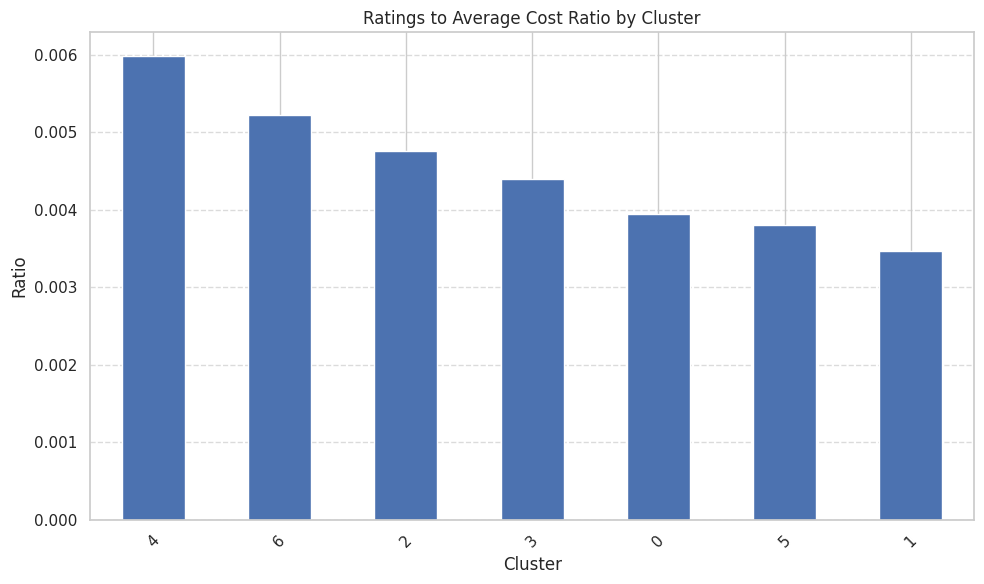

In [105]:
#@title Ratings to Average cost Ratio
ax = (cost_ratings_data.Avg_Ratings/cost_ratings_data.Cost).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
# Adding labels and title
plt.title('Ratings to Average Cost Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# **Conclusion**



## Cluster Analysis
- Cluster 1 has low cost and, a high ratio of ratings to cost. This cluster has a variety of cuisines, such as desserts, continental, biryani, and Chinese, which may indicate that these restaurants **offer a good balance of quality, price, and diversity**.

- Cluster 2 has the highest average cost and ratings, indicating that it consists of high-end restaurants that offer premium quality and service. The cuisine of this cluster is mainly Italian and Asian, suggesting that these are **popular and profitable choices for upscale dining**.

- Cluster 5 has the second highest average ratings, but a lower cost than cluster 2. This cluster has a large proportion of Asian restaurants, indicating that this **cuisine is well-liked and affordable by the customers**. This cluster also has some continental and Chinese restaurants, which may appeal to a diverse range of tastes and preferences.

- Cluster 4 has the lowest average ratings, but a moderate cost. This cluster is dominated by biryani and Chinese restaurants, which may indicate that these cuisines are oversaturated or underperforming in the market. **The low ratings may also reflect the quality, service, or hygiene issues of these restaurants.**

- Cluster 6 has the lowest average cost, but also low ratings. This cluster consists mostly of fast food restaurants, which may cater to the budget-conscious or time-pressed customers. However, **the low ratings may suggest that these restaurants do not offer much value or satisfaction to the customers.**

- Cluster 0 and 3 have similar costs and ratings, but different cuisines. Cluster 0 has mostly north Indian and Chinese restaurants, while cluster 3 has mostly south Indian and continental restaurants. **These clusters may reflect the regional and cultural preferences of the customers, as well as the availability and competition of these cuisines in the market.**


## **Summary of Business Case Solutions Based on Insights:**

1. **Optimizing Food and Place Experiences:**
   - Invest in improving the quality and ambiance of restaurants, focusing on addressing the high negative sentiment associated with food and place.

2. **Strategic Approach to Chicken Dishes:**
   - Implement a detailed review and improvement strategy specifically for chicken dishes, given their high impact on both positive and negative sentiments.

3. **Prioritizing Consistent Service Quality:**
   - Develop and implement training programs for staff to ensure consistent service quality, considering its influence on overall customer satisfaction.

4. **Balancing Experience and Taste:**
   - Conduct regular quality checks to maintain positive sentiments related to experience and taste, mitigating the negative impact of occasional lapses.

5. **Emphasizing Quality Over Speed and Accuracy:**
   - Adjust operational priorities to prioritize food quality over speed and accuracy, aligning with customer preferences.

6. **Addressing Value for Money Concerns:**
   - Review pricing strategies to align with customer expectations and communicate value-added services to address the negative sentiment associated with money.

7. **Strategic Approach to Cluster Insights:**
   - Provide insights to restaurants based on their cluster categorization, enabling them to tailor strategies for improvement or expansion.

8. **Encouraging Diversity in Cuisine Offerings:**
   - Encourage restaurants to diversify their cuisine offerings based on cluster insights to meet varied customer preferences.

These specific business case solutions derived from the insights aim to guide Zomato and its partner restaurants in addressing key areas of improvement, optimizing customer satisfaction, and fostering sustainable business growth.